# Deep Neural Network for Image Classification: Lingon classification

The developed model is based on Cousera Course-lab "Deep Neural Network for Image Classification: Application" - by Andrew Ng

The purpose of the adaptation of the lab and algorithm is to be able to selecet lingonberries from scrap and other type of berries.

An utility file is developed (lingon_utils.py) to pre-process the labeled images to fit the required input formats for the algoritm. The sets are stored in sub-directories within "./datasets"-directory.. 



## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [3]:
import time
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import scipy - removes due to depricication of scipy.misc.imresize, solution changed to  plt.imshow
from PIL import Image
#from scipy import ndimage - solution changed to PIL - image based.
from dnn_app_utils_v3 import *

#import lingon_utils - importen finns inte med i lingon_logistic
from lingon_utils import load_lingon_dataset
from lingon_utils import load_lingon_testset

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

## 2 - Dataset

The dataset is taken from labled images: "lingon" and "icke-lingon" i.e lingonberries or not. The image sets are stored in the datasets folder as jpeg-images. The datases, train and dev/test, are preprocessed before training and dev/test. 

**Problem Statement**: You are given a dataset ("data.h5") containing:


    - a training set of m_train images labelled as lingon (1) or icke-lingon (0)
    - a test set of m_test images labelled as lingon and icke-lingon
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [4]:
#train_x_orig, train_y, test_x_orig, test_y, classes = load_data()- in lab
train_x_orig, train_y, test_x_orig, test_y, classes = load_lingon_dataset(64,64)

C:\Users\tomas\miniconda3\envs\w3spyder-env\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


In [142]:
print("Träningssetet:")
print(type(train_x_orig))
print(train_x_orig.shape)
print(type(train_y))
print(train_y.shape)
print("Testsetet:")
print(type(test_x_orig))
print(test_x_orig.shape)
print(type(test_y))
print(test_y.shape)
print("Klasserna:")
print(type(classes))
print(classes)

Träningssetet:
<class 'numpy.ndarray'>
(210, 64, 64, 3)
<class 'numpy.ndarray'>
(1, 210)
Testsetet:
<class 'numpy.ndarray'>
(52, 64, 64, 3)
<class 'numpy.ndarray'>
(1, 52)
Klasserna:
<class 'tuple'>
('icke-lingon', 'lingon')


### Visual verification of train- and testsets ###

Steps:<br>
1) Visually verify separte images by label and array<br>
2) Visually verify  separate images by label and image

In [6]:
# Choose index for the picture
set_type = "train"
index =100
#y = train_set_y_orig[0, index]
if set_type == "train":
    print(set_type+":image "+ str(index))
    print("y = " + str(train_y[0, index])+" ,"+classes[train_y[0, index]])
    print(train_x_orig[index,:])
    
elif set_type == "test":
    print(set_type+":image "+ str(index))
    print("y = " + str(test_y[0, index])+" ,"+classes[test_y[0, index]])
    print (test_x_orig[index,:])

train:image 100
y = 0 ,icke-lingon
[[[ 76  68  55]
  [ 75  67  54]
  [ 76  66  54]
  ...
  [140  98  60]
  [113  70  35]
  [ 88  45  10]]

 [[133 123 111]
  [133 123 111]
  [133 123 111]
  ...
  [204 162 122]
  [159 117  79]
  [106  63  28]]

 [[151 141 129]
  [151 141 129]
  [151 141 129]
  ...
  [244 202 160]
  [214 172 132]
  [163 121  81]]

 ...

 [[107  97  88]
  [111 101  92]
  [114 104  95]
  ...
  [137 115  91]
  [137 115  91]
  [135 113  89]]

 [[ 95  85  76]
  [114 104  95]
  [124 114 105]
  ...
  [134 114  89]
  [134 114  89]
  [132 112  87]]

 [[ 76  66  57]
  [108  98  89]
  [127 117 108]
  ...
  [135 115  91]
  [135 115  91]
  [134 114  90]]]


#### Visual verification of label and image using Pillow ####

test:image 2 with index 1
y = 1 ,lingon


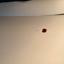

In [7]:
# välj index för bilden
set_type = "test"
index = 1  #startar med 0
# Testa bilderna i tränintsetet visuellt
if set_type == "train":
    y = train_y[0, index]
    print(set_type+":image "+ str(index+1)+ " with index "+ str(index))
    print("y = " + str(train_y[0, index])+" ,"+classes[train_y[0, index]])
    lingonbild = Image.fromarray(train_x_orig[index, :])
    display(lingonbild)

# Testa bilderna i testsetet visuellt
elif set_type == "test":
    y = test_y[0, index]
    print(set_type+":image "+ str(index+1)+ " with index "+ str(index))
    print("y = " + str(test_y[0, index])+" ,"+classes[test_y[0, index]])
    lingonbild = Image.fromarray(test_x_orig[index, :])
    display(lingonbild)
  

#### Visual verification of label and image using Matplotlib ####

test:image 43 with index 42
y = 1 ,lingon


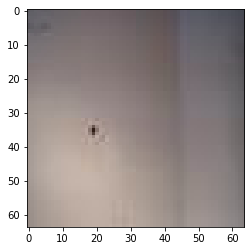

In [8]:
# välj index för bilden
set_type = "test"      # välj set 
index =42                # sätt in index, första bild har index 0

# Testa bilderna i tränintsetet visuellt
if set_type == "train":
    y = train_y[0, index]
    print(set_type+":image "+ str(index+1)+ " with index "+ str(index))
    print("y = " + str(train_y[0, index])+" ,"+classes[train_y[0, index]])
    plt.imshow(train_x_orig[index,:])

# Testa bilderna i testsetet visuellt
elif set_type == "test":
    y = test_y[0, index]
    print(set_type+":image "+ str(index+1)+ " with index "+ str(index))
    print("y = " + str(test_y[0, index])+" ,"+classes[test_y[0, index]])
    plt.imshow(test_x_orig[index,:])

In [9]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 210
Number of testing examples: 52
Each image is of size: (64, 64, 3)
train_x_orig shape: (210, 64, 64, 3)
train_y shape: (1, 210)
test_x_orig shape: (52, 64, 64, 3)
test_y shape: (1, 52)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.

<img src="images/imvectorkiank_lingon.png" style="width:650px;height:300px;">

<caption><center> <u>Figure 1</u>: Image to vector conversion. <br> </center></caption>

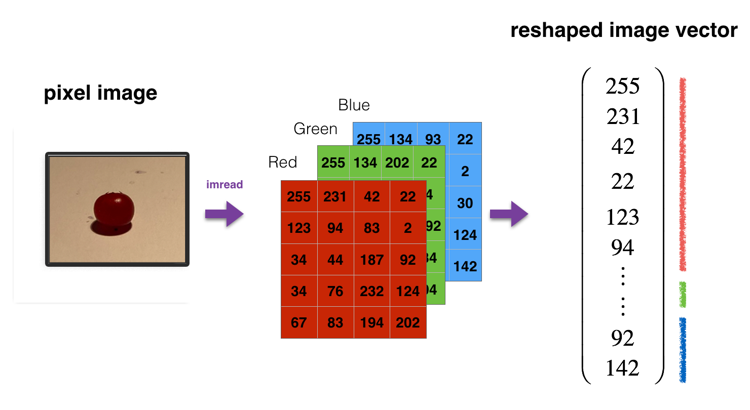

In [24]:
#Only execute to display image in GIT
im_imvectorkiank_lingon = Image.open("images/imvectorkiank_lingon.png")
size = 750, 450
im_imvectorkiank_lingon.thumbnail(size)
display(im_imvectorkiank_lingon)

In [10]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 210)
test_x's shape: (12288, 52)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 3 - Architecture of the model

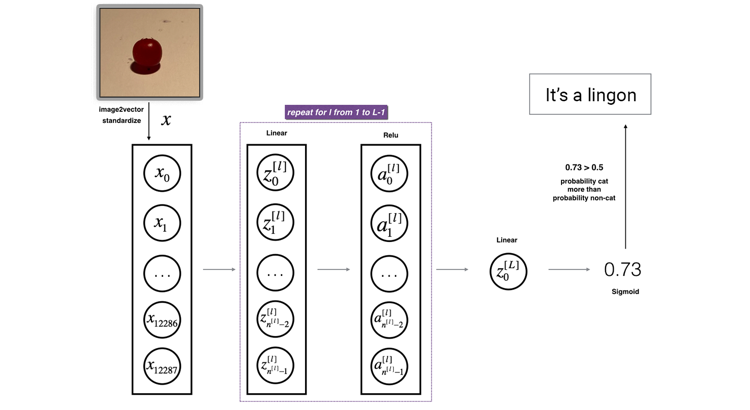

In [11]:
#Only execute to display image in GIT
im_imvectorkiank_lingon = Image.open("images/LlayerNN_kiank_lingon.png")
size = 750, 450
im_imvectorkiank_lingon.thumbnail(size)
display(im_imvectorkiank_lingon)

<img src="images/LlayerNN_kiank_lingon.png" style="width:850px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:<br>
    1. Initialize parameters / Define hyperparameters<br>
    2. Loop for num_iterations:<br>
    <BLOCKQUOTE>
        a. Forward propagation<br>
        b. Compute cost function<br>
        c. Backward propagation<br>
        d. Update parameters (using parameters, and grads from backprop)<br> 
    </BLOCKQUOTE>
    4. Use trained parameters to predict labels<br>

Let's now implement those two models!

Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

Let's look at the two architectures


### 3.1 - 2-layer neural network


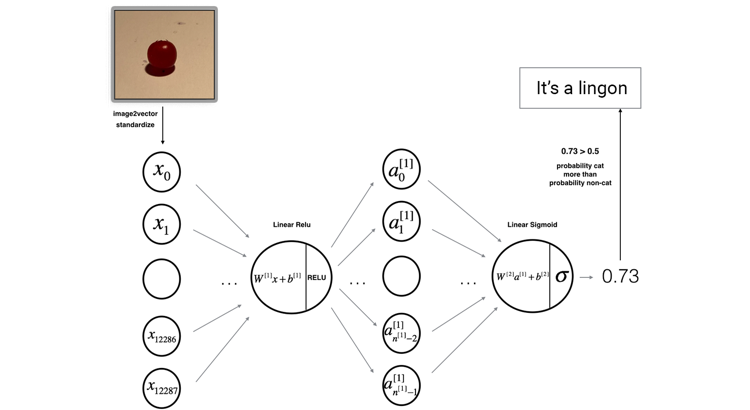

In [34]:
#Only execute to enable display image in GIT
two_layerNN_kiank_lingon = Image.open("images/2layerNN_kiank_lingon.png")
size = 750, 750
two_layerNN_kiank_lingon.thumbnail(size)
display(two_layerNN_kiank_lingon)


<img src="images/2layerNN_kiank_lingon.png" style="width:850px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Detailed Architecture of figure 2</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a lingon.

### 3.2 - L-layer deep neural network

It is hard to represent an L-layer deep neural network with the above representation. However, here is a simplified network representation:

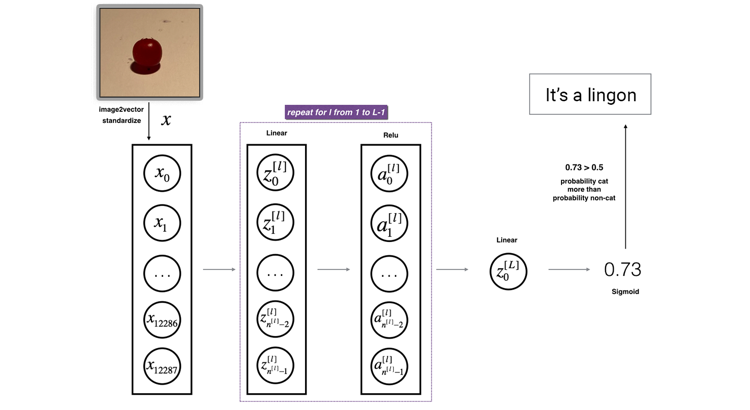

In [35]:
#Only execute to enable display image in GIT
LlayerNN_kiank_lingon = Image.open("images/LlayerNN_kiank_lingon.png")
size = 750, 750
LlayerNN_kiank_lingon.thumbnail(size)
display(layerNN_kiank_lingon)

<img src="images/LlayerNN_kiank_lingon.png" style="width:850px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

### 3.3 - General methodology

As usual you will follow the Deep Learning methodology to build the model:<br>
    1. Initialize parameters / Define hyperparameters<br>
    2. Loop for num_iterations:<br>
    <BLOCKQUOTE>
        a. Forward propagation<br>
        b. Compute cost function<br>
        c. Backward propagation<br>
        d. Update parameters (using parameters, and grads from backprop)<br> 
    </BLOCKQUOTE>
    4. Use trained parameters to predict labels<br>

Let's now implement those two models!

## 4 - Two-layer neural network

**Question**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [64]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [65]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters =  initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation = "relu")
        A2, cache2 = linear_activation_forward(A1, W2,b2, activation = "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost (A2,Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters =  update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.6916936611030974
Cost after iteration 100: 0.5404046765399795
Cost after iteration 200: 0.15539951266392732
Cost after iteration 300: 0.07159301439047054
Cost after iteration 400: 0.05178456893191823
Cost after iteration 500: 0.041285024438414746
Cost after iteration 600: 0.03384200989008064
Cost after iteration 700: 0.02829934165098831
Cost after iteration 800: 0.024195441402225244
Cost after iteration 900: 0.02113891061618605
Cost after iteration 1000: 0.01881529900825674
Cost after iteration 1100: 0.017004814239716597
Cost after iteration 1200: 0.015560968262347576
Cost after iteration 1300: 0.01438550789416625
Cost after iteration 1400: 0.013410824756498943
Cost after iteration 1500: 0.012589236562459812
Cost after iteration 1600: 0.011886421021440916
Cost after iteration 1700: 0.011277225096688596
Cost after iteration 1800: 0.010742927112484606
Cost after iteration 1900: 0.010269371546947478
Cost after iteration 2000: 0.009845745529652516
Cost after itera

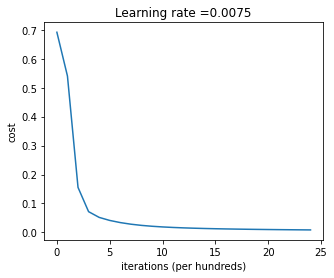

In [66]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

**Expected Output**:
<table> 
    <tr>
        <td> **Cost after iteration 0**</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> **Cost after iteration 100**</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> **...**</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> **Cost after iteration 2400**</td>
        <td> 0.048554785628770226 </td>
    </tr>
</table>

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [67]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.995238095238095


In [68]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 1.0000000000000002


**Note**: You may notice that running the model on fewer iterations (say 1500) gives better accuracy on the test set. This is called "early stopping" and we will talk about it in the next course. Early stopping is a way to prevent overfitting. 

Congratulations! It seems that your 2-layer neural network has better performance (72%) than the logistic regression implementation (70%, assignment week 2). Let's see if you can do even better with an $L$-layer model.

## 5 - L-layer Neural Network

**Question**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [69]:
### CONSTANTS ###
layers_dims = [12288, 5, 5, 1] #layers_dims = [12288,7, 5, 1]   4-layer model#layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [70]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches =L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
             
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

You will now train the model as a 4-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.811395
Cost after iteration 100: 0.535033
Cost after iteration 200: 0.325698
Cost after iteration 300: 0.267020
Cost after iteration 400: 0.243180
Cost after iteration 500: 0.222425
Cost after iteration 600: 0.203705
Cost after iteration 700: 0.186888
Cost after iteration 800: 0.171983
Cost after iteration 900: 0.158936
Cost after iteration 1000: 0.147537
Cost after iteration 1100: 0.137550
Cost after iteration 1200: 0.128804
Cost after iteration 1300: 0.121100
Cost after iteration 1400: 0.114172
Cost after iteration 1500: 0.107856
Cost after iteration 1600: 0.102155
Cost after iteration 1700: 0.096961
Cost after iteration 1800: 0.092258
Cost after iteration 1900: 0.087928
Cost after iteration 2000: 0.083956
Cost after iteration 2100: 0.080280
Cost after iteration 2200: 0.076935
Cost after iteration 2300: 0.073789
Cost after iteration 2400: 0.070912


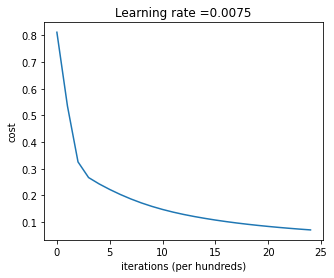

In [71]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [72]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.995238095238095


In [73]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 1.0000000000000002


**Expected Output**:

<table> 
    <tr>
        <td> **Test Accuracy**</td>
        <td> 0.8 </td>
    </tr>
</table>

Conclusion: It was not possible to run a 4-layer network on this "easy" data, 3 layer was ok. Need to analyse i.e try with other data and also verify code.  

##  6) Results Analysis

First, let's take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

In [74]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

**A few types of images the model tends to do poorly on include:** 
- Unusual position
- Appearance against a background of a similar color
- Unusual berry color
- Camera Angle
- Brightness of the picture
- Scale variation (lingonberry is very large or small in image) 

## 7) Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = lingon, 0 = icke-lingon)!

(12288, 1)
Accuracy: 1.0
y = 0 , means that algortim predicts: icke-lingon


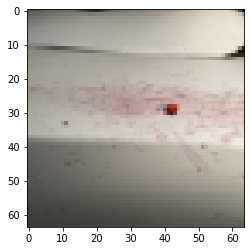

In [151]:
## START CODE HERE ##
my_image = "rönnbär1.JPEG" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> lingon, 0 -> icke-lingon)
## END CODE HERE ##

fname = "images/" + my_image
image_conv = Image.open(fname)
image_conv = image_conv.resize((num_px,num_px))
image = np.asarray(image_conv)
image = image/255.
my_image = image.reshape(1, num_px*num_px*3).T
print(my_image.shape)


my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print("y = "+str(np.squeeze(int(my_predicted_image)))+ " , means that algortim predicts: "+ classes[np.squeeze(int(my_predicted_image))])
#plt.imshow(image)
#print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

##  Run and eveluate trained model on different test sets ##

Purpose is to evaluate lingon- no-lingon model on different test sets e.g.:<br>
    - no-lingon is combination of other berries and scrap <br>
    - no-lingon is other berries  <br>
    - changed number of images of the total test set <br>
     <br>
To do that: <br>
    1. Get a list of directories containing different test sets <br>
    2. Call for utility that prepare the selected test set  <br>
    3. Run and eveluate testset on algoritm to check if it is right (lingon , no-lingon)  <br>
    4. Run the code and check if the algorithm is right (1 = lingon, 0 = icke-lingon)!  <br>
 <a id='ankare_1'></a>

In [98]:
test_dirs = [dir for dir in os.listdir(path = ('./datasets')) if "test" in dir]
print("The different re-test testsets directories:\n")
for dir in test_dirs:
    print(dir)

The different re-test testsets directories:

testset_lingon_skräp_bär_100
test_catvnoncat.h5
test_lingonset


### Call for a test set and re-evaluate the algoritm ###

In [99]:
# Call for the algoritm by call the  load_lingon_testset() - funktion in lingon_utils.py
# Parameters are the reshape parameters: num_px , num_py and testset directory within quotes "...".
#nx_px and ny_py are default 64 pixels.
re_test_set_x_orig, Y_re_test = load_lingon_testset("testset_lingon_skräp_bär_100",64 ,64)

In [158]:
print("Verify re-evalution test-set:")
print(type(re_test_set_x_orig))
print(re_test_set_x_orig.shape)
print(type(Y_re_test))
print(Y_re_test.shape)


Verify re-evalution test-set:
<class 'numpy.ndarray'>
(100, 64, 64, 3)
<class 'numpy.ndarray'>
(1, 100)


In [101]:
#Flatten and normalize  
re_test_set_x_flatten = re_test_set_x_orig.reshape(re_test_set_x_orig.shape[0],-1).T
print(re_test_set_x_flatten.shape)
re_test_set_x = re_test_set_x_flatten/255.

(12288, 100)


In [102]:
pred_test = predict(re_test_set_x, Y_re_test, parameters)

Accuracy: 0.9099999999999999


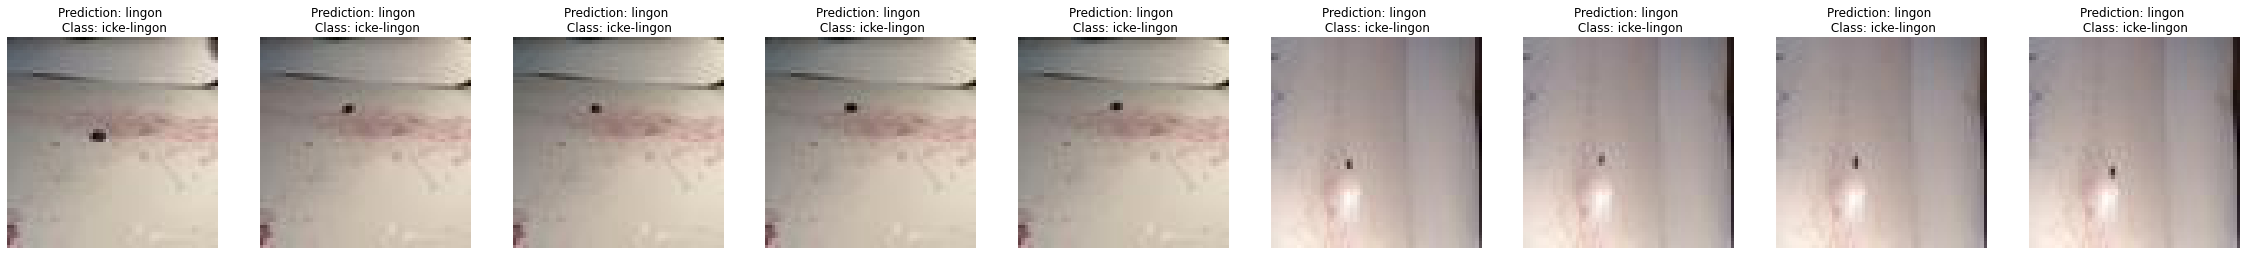

In [157]:
print_mislabeled_images(classes, re_test_set_x, Y_re_test, pred_test)

**References**:

- for auto-reloading external module: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython